***<h1 style="text-align: center;">Final Project for<br>DTSA 5509 Introduction to Machine Learning:<br>Supervised Learning</h1>***

***<p style="text-align: center;">by Ryan Ordonez</p>***

***

 <h2 align="center">Fantasy Football Point Predictor</h2>

### Step 1: Gather data

In [1]:
# Install necessary libraries
!pip install -q pandas
!pip install -q numpy
!pip install -q matplotlib
!pip install -q seaborn
!pip install -q spicy
!pip install -q scikit-learn
!pip install -q statsmodels

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Collect the Data (Step 1)

- The data for this project includes player statistics and fantasy points scored per game for the 2019, 2020, 2021, and 2023 seasons. 
- The data was obtained from two different sources.
- The first being from Kaggle at: https://www.kaggle.com/datasets/dtrade84/nfl-offensive-stats-2019-2022
- The second being from fantasydata.com at:  https://sportsdata.io/members/download-file?product=1389b51c-eb37-4fed-adaa-118c147dad4d
<br>I was required to pay a small price for the 2023 dataset so I will be adding it to my GitHub repo for this project. 


# Define the Problem (Step 2)
Problem Statement:
I have always had issues determining the correct players to draft for the upcoming NFL Fantasy Football season.
The goal of this project is to predict the fantasy football points a player will score in the upcoming 2024 season based on historical data from the 2019-2023 seasons.
It will then rank these players in order of fantasy football projected points so I can draft the best available person every round.
This proposed projection will be better than other widely used analysis tools as I will incorporate new features and more dynamic ML models to predicts the correct points per game by each player.

---

<h1>Exploratory Data Analysis (Step 3)</h1>
<h3>Inspect, Visualize and Clean the Data</h3>

In [3]:
# Load the data
# Replace 'data_file_path.csv' with the actual file path of your dataset
data_file_path1 = 'https://raw.githubusercontent.com/RyanOrdonez/DTSA-5509-Introduction-to-Machine-Learning-Supervised-Learning-Final-Project/main/nfl_offensive_stats.csv'
data1 = pd.read_csv(data_file_path1)
data_file_path2 = 'https://raw.githubusercontent.com/RyanOrdonez/DTSA-5509-Introduction-to-Machine-Learning-Supervised-Learning-Final-Project/main/PlayerGame.2023.csv'
data2 = pd.read_csv(data_file_path2)

In [4]:
# Inspect datasets
print("\nData types:")
print(data1.dtypes)
print(data2.dtypes)


Data types:
game_id            object
player_id          object
position           object
player             object
team               object
                   ...   
Wind_Speed          int64
Vegas_Line        float64
Vegas_Favorite     object
Over_Under        float64
game_date          object
Length: 69, dtype: object
PlayerID                     int64
SeasonType                   int64
Season                       int64
GameDate                    object
Week                         int64
                            ...   
FantasyPointsDraftKings    float64
InjuryStatus                object
TeamID                       int64
OpponentID                   int64
ScoreID                      int64
Length: 78, dtype: object


In [5]:
# Visualize datasets
print("\nData types:")
print(data1.columns.tolist())
print(data2.columns.tolist())
data1.head()


Data types:
['game_id', 'player_id', 'position ', 'player', 'team', 'pass_cmp', 'pass_att', 'pass_yds', 'pass_td', 'pass_int', 'pass_sacked', 'pass_sacked_yds', 'pass_long', 'pass_rating', 'rush_att', 'rush_yds', 'rush_td', 'rush_long', 'targets', 'rec', 'rec_yds', 'rec_td', 'rec_long', 'fumbles_lost', 'rush_scrambles', 'designed_rush_att', 'comb_pass_rush_play', 'comb_pass_play', 'comb_rush_play', 'Team_abbrev', 'Opponent_abbrev', 'two_point_conv', 'total_ret_td', 'offensive_fumble_recovery_td', 'pass_yds_bonus', 'rush_yds_bonus', 'rec_yds_bonus', 'Total_DKP', 'Off_DKP', 'Total_FDP', 'Off_FDP', 'Total_SDP', 'Off_SDP', 'pass_target_yds', 'pass_poor_throws', 'pass_blitzed', 'pass_hurried', 'rush_yds_before_contact', 'rush_yac', 'rush_broken_tackles', 'rec_air_yds', 'rec_yac', 'rec_drops', 'offense', 'off_pct', 'vis_team', 'home_team', 'vis_score', 'home_score', 'OT', 'Roof', 'Surface', 'Temperature', 'Humidity', 'Wind_Speed', 'Vegas_Line', 'Vegas_Favorite', 'Over_Under', 'game_date']
[

,game_id,player_id,position,player,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,...,OT,Roof,Surface,Temperature,Humidity,Wind_Speed,Vegas_Line,Vegas_Favorite,Over_Under,game_date
0,201909050chi,RodgAa00,QB,Aaron Rodgers,GNB,18,30,203,1,0,...,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,9/5/2019
1,201909050chi,JoneAa00,RB,Aaron Jones,GNB,0,0,0,0,0,...,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,9/5/2019
2,201909050chi,ValdMa00,WR,Marquez Valdes-Scantling,GNB,0,0,0,0,0,...,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,9/5/2019
3,201909050chi,AdamDa01,WR,Davante Adams,GNB,0,0,0,0,0,...,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,9/5/2019
4,201909050chi,GrahJi00,TE,Jimmy Graham,GNB,0,0,0,0,0,...,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,9/5/2019


In [6]:
# Clean the data!!
# Fixing the column name with extra space in the first dataset
data1.rename(columns={'position ': 'position'}, inplace=True)

In [7]:
# Create a unique identifier in both datasets
data1['PlayerID'] = data1['player'].astype(str) + "_" + data1['position'].astype(str) + "_" + data1['team'].astype(str)
data2['PlayerID'] = data2['Name'].astype(str) + "_" + data2['Position'].astype(str) + "_" + data2['Team'].astype(str)

In [8]:
# REMOVE PRESEASON GAME DATA
# Filter out rows where 'SeasonType' is 2
data2 = data2[data2['SeasonType'] != 2]
# Drop the 'SeasonType' column
data2 = data2.drop(columns=['SeasonType'])

In [9]:
# List only the columns in each dataset to keep
columns_to_keep_data1 = [
    'PlayerID', 'game_date', 'player', 'position', 'team', 'pass_cmp', 'pass_att', 'pass_yds', 
    'pass_td', 'pass_rating', 'pass_int', 'rush_att', 'rush_yds', 'rush_td', 
    'targets', 'rec', 'rec_yds', 'rec_td', 'Total_SDP', 'vis_team', 'home_team', 
    'vis_score', 'home_score'
]
columns_to_keep_data2 = [
    'PlayerID', 'GameDate', 'Name', 'Position', 'Team', 'PassingCompletions', 'PassingAttempts', 
    'PassingYards', 'PassingTouchdowns', 'PassingRating', 'PassingInterceptions', 
    'RushingAttempts', 'RushingYards', 'RushingTouchdowns', 'ReceivingTargets', 
    'Receptions', 'ReceivingYards', 'ReceivingTouchdowns', 'FantasyPoints', 'Opponent', 
    'HomeOrAway'
]
data1 = data1[columns_to_keep_data1]
data2 = data2[columns_to_keep_data2]

In [10]:
# Fixing differenences in columns to be able to merge
# Create the 'Opponent' column
data1['Opponent'] = data1.apply(lambda row: row['home_team'] if row['team'] == row['vis_team'] else row['vis_team'], axis=1)
# Create the 'HomeOrAway' column
data1['HomeOrAway'] = data1.apply(lambda row: 'Away' if row['team'] == row['vis_team'] else 'Home', axis=1)
# Dropping unnecessary columns from data1
data1.drop(columns=['vis_team', 'home_team', 'vis_score', 'home_score'], inplace=True)

In [11]:
# Renaming columns in data1 to match data2
data1.rename(columns={
    'game_date': 'GameDate',
    'player': 'Name',
    'position': 'Position',
    'team': 'Team',
    'pass_cmp': 'PassingCompletions',
    'pass_att': 'PassingAttempts',
    'pass_yds': 'PassingYards',
    'pass_td': 'PassingTouchdowns',
    'pass_rating': 'PassingRating',
    'pass_int': 'PassingInterceptions',
    'rush_att': 'RushingAttempts',
    'rush_yds': 'RushingYards',
    'rush_td': 'RushingTouchdowns',
    'targets': 'ReceivingTargets',
    'rec': 'Receptions',
    'rec_yds': 'ReceivingYards',
    'rec_td': 'ReceivingTouchdowns',
    'Total_SDP': 'FantasyPoints'
}, inplace=True)

In [12]:
# Suppressing the warning
warnings.filterwarnings("ignore", category=UserWarning)

# Preprocess the 'GameDate' column in both datasets
data1['GameDate'] = pd.to_datetime(data1['GameDate']).dt.strftime('%m/%d/%Y')
data2['GameDate'] = pd.to_datetime(data2['GameDate']).dt.strftime('%m/%d/%Y')

In [13]:
# Merging the data with preference for data1 values
merged_data = data1.combine_first(data2)
merged_data['GameDate'] = pd.to_datetime(merged_data['GameDate'], format='%m/%d/%Y')


---

### Visualize the distribution of fantasy points

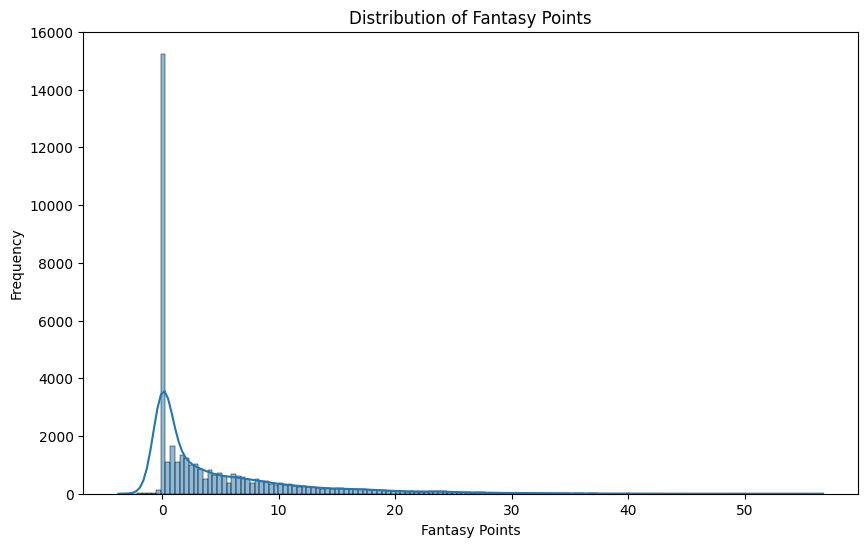

In [14]:
# Histogram of Fantasy Points
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['FantasyPoints'], kde=True)
plt.title('Distribution of Fantasy Points')
plt.xlabel('Fantasy Points')
plt.ylabel('Frequency')
plt.show()

### Remove distributions where the player did not play

In [15]:
# Check if fantasy points are zero
zero_fp_mask = merged_data['FantasyPoints'] == 0

# Check if passing, rushing, or receiving attempts are nonzero
nonzero_attempts_mask = (
    (merged_data['PassingAttempts'] != 0) |
    (merged_data['RushingAttempts'] != 0) |
    (merged_data['ReceivingTargets'] != 0)
)

# Combine the masks
remove_rows_mask = zero_fp_mask & ~nonzero_attempts_mask

# Remove rows where fantasy points are zero and at least one of the attempts columns is nonzero
prefiltered = merged_data[~remove_rows_mask]

# List of offensive positions
offensive_positions = ['QB', 'RB', 'WR', 'TE', 'FB', 'HB', 'FB/D', 'FB/R', 'RB/W', 'WR/R']

# Mapping dictionary for position categories
position_mapping = {
    'FB/D': 'FB',
    'FB/R': 'FB',
    'RB/W': 'RB',
    'HB': 'RB',
    'WR/R': 'WR'
}

prefiltered.loc[:, 'Position'] = prefiltered['Position'].replace(position_mapping)


# Filter the dataset to keep only offensive positions
filtered_data = prefiltered[prefiltered['Position'].isin(offensive_positions)]


### Revisualize the Distribution

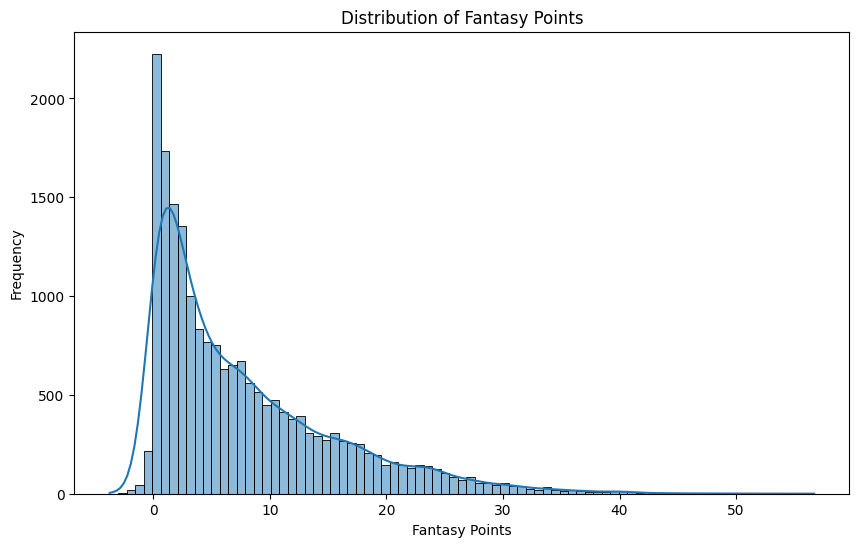

In [16]:
# Histogram of Fantasy Points
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['FantasyPoints'], kde=True)
plt.title('Distribution of Fantasy Points')
plt.xlabel('Fantasy Points')
plt.ylabel('Frequency')
plt.show()

---

### Explore correlations between different features and fantasy points

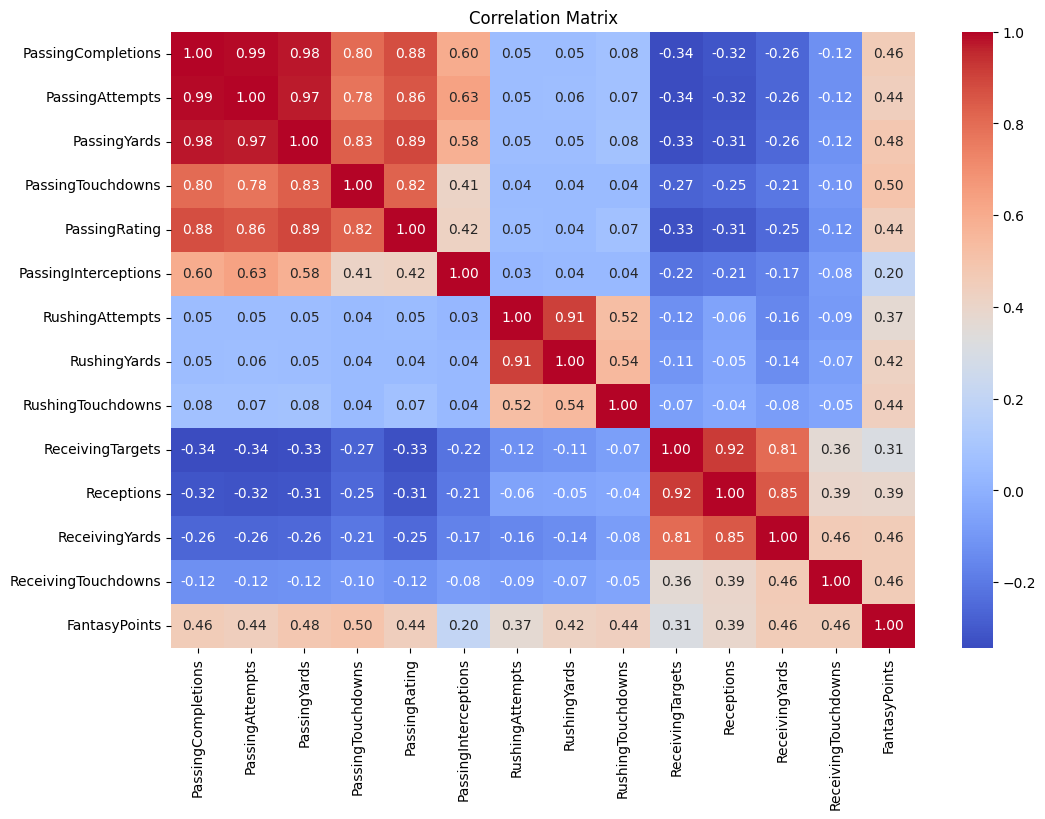

In [17]:
# Selecting only numeric columns for correlation analysis
numeric_cols = filtered_data.select_dtypes(include='number')

# Correlation matrix with Fantasy Points
correlation_matrix = numeric_cols.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


---

### Identify outliers and handle them if necessary

In [19]:
# Select numeric columns for outlier detection
numeric_columns = ['PassingCompletions', 'PassingAttempts', 'PassingYards', 'PassingTouchdowns',
                   'PassingRating', 'PassingInterceptions', 'RushingAttempts', 'RushingYards',
                   'RushingTouchdowns', 'ReceivingTargets', 'Receptions', 'ReceivingYards',
                   'ReceivingTouchdowns', 'FantasyPoints']

# Calculate z-score for each numeric column
z_scores = stats.zscore(filtered_data[numeric_columns])

# Define threshold for z-score
z_score_threshold = 3

# Identify rows where any numeric column exceeds the threshold
outlier_mask = (np.abs(z_scores) > z_score_threshold).any(axis=1)

# Count the number of outliers
num_outliers = outlier_mask.sum()
print("Number of outliers:", num_outliers)

# reviewed dataset and the outliers are normal, mostly due to players that were only used for 1 play or out of position play

Number of outliers: 3280


### View the Distribution based on position

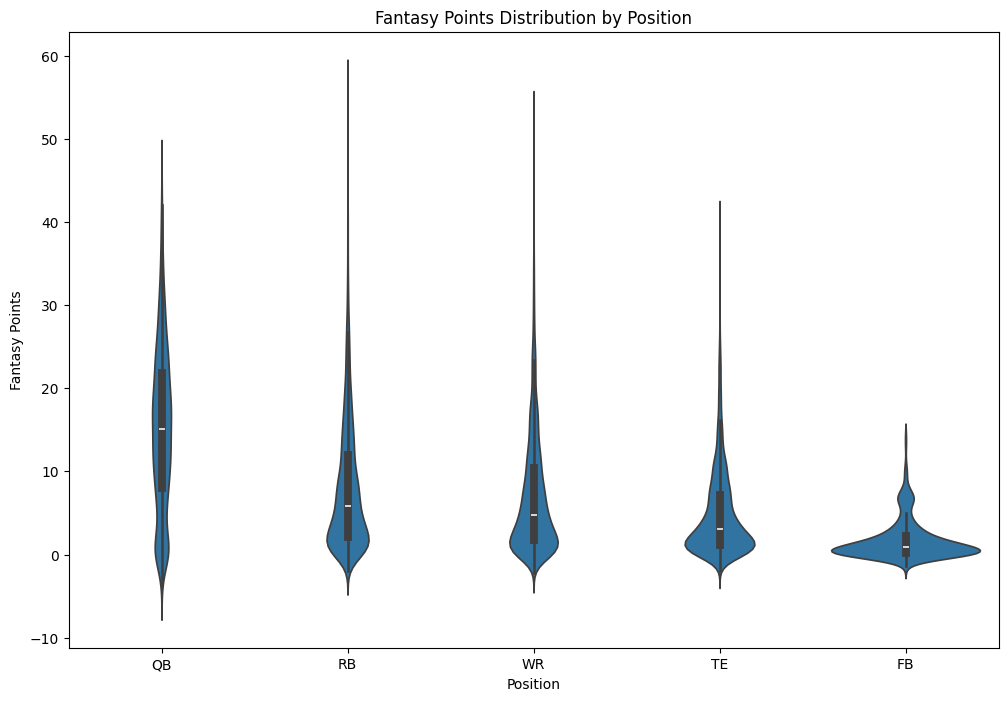

In [20]:
# Calculate median fantasy points for each position
median_points_by_position = filtered_data.groupby('Position')['FantasyPoints'].median().sort_values(ascending=False).index

# Create a violin plot of fantasy points by position with ordered positions
plt.figure(figsize=(12, 8))
sns.violinplot(x='Position', y='FantasyPoints', data=filtered_data, order=median_points_by_position)
plt.title('Fantasy Points Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Fantasy Points')
plt.show()


---

<h1>Perform Analysis Using Supervised Machine Learning Models (Step 4)</h1>

- Start the main analysis such as classification or regression
- Use multiple models to compare

In [21]:
# Perform one-hot encoding on the 'Position' column
encoded_data = pd.get_dummies(filtered_data, columns=['Position'])

In [22]:
# Perform one-hot encoding on the 'Opponent' column
opponent_one_hot = pd.get_dummies(encoded_data['Opponent'], prefix='Opponent')

# Concatenate the one-hot encoded dataframe with the original dataframe
data_encoded = pd.concat([encoded_data, opponent_one_hot], axis=1)

# Drop the original 'Opponent' column
data_encoded.drop('Opponent', axis=1, inplace=True)

In [23]:
# Convert 'HomeOrAway' column values to lowercase
data_encoded['HomeOrAway'] = data_encoded['HomeOrAway'].str.lower()

# Perform one-hot encoding on the 'HomeOrAway' column
one_hot_encoded = pd.get_dummies(data_encoded['HomeOrAway'], prefix='HomeOrAway')

# Concatenate the one-hot encoded columns with the original DataFrame
after_encoding = pd.concat([data_encoded, one_hot_encoded], axis=1)

# Drop the original 'HomeOrAway' column
after_encoding.drop('HomeOrAway', axis=1, inplace=True)


In [24]:
print(after_encoding.columns.tolist())

['PlayerID', 'GameDate', 'Name', 'Team', 'PassingCompletions', 'PassingAttempts', 'PassingYards', 'PassingTouchdowns', 'PassingRating', 'PassingInterceptions', 'RushingAttempts', 'RushingYards', 'RushingTouchdowns', 'ReceivingTargets', 'Receptions', 'ReceivingYards', 'ReceivingTouchdowns', 'FantasyPoints', 'Position_FB', 'Position_QB', 'Position_RB', 'Position_TE', 'Position_WR', 'Opponent_ARI', 'Opponent_ATL', 'Opponent_BAL', 'Opponent_BUF', 'Opponent_CAR', 'Opponent_CHI', 'Opponent_CIN', 'Opponent_CLE', 'Opponent_DAL', 'Opponent_DEN', 'Opponent_DET', 'Opponent_GB', 'Opponent_GNB', 'Opponent_HOU', 'Opponent_IND', 'Opponent_JAX', 'Opponent_KAN', 'Opponent_KC', 'Opponent_LAC', 'Opponent_LAR', 'Opponent_LV', 'Opponent_LVR', 'Opponent_MIA', 'Opponent_MIN', 'Opponent_NE', 'Opponent_NO', 'Opponent_NOR', 'Opponent_NWE', 'Opponent_NYG', 'Opponent_NYJ', 'Opponent_PHI', 'Opponent_PIT', 'Opponent_SEA', 'Opponent_SF', 'Opponent_SFO', 'Opponent_TAM', 'Opponent_TB', 'Opponent_TEN', 'Opponent_WAS', 

In [25]:
# Perform LinearRegression
X = after_encoding[['PassingCompletions', 'PassingAttempts', 'PassingYards', 'PassingTouchdowns', 'PassingRating', 'PassingInterceptions', 'RushingAttempts', 'RushingYards', 'RushingTouchdowns', 'ReceivingTargets', 'Receptions', 'ReceivingYards', 'ReceivingTouchdowns', 'HomeOrAway_away', 'HomeOrAway_home', 'Position_FB', 'Position_QB', 'Position_RB', 'Position_TE', 'Position_WR', 'Opponent_ARI', 'Opponent_ATL', 'Opponent_BAL', 'Opponent_BUF', 'Opponent_CAR', 'Opponent_CHI', 'Opponent_CIN', 'Opponent_CLE', 'Opponent_DAL', 'Opponent_DEN', 'Opponent_DET', 'Opponent_GB', 'Opponent_GNB', 'Opponent_HOU', 'Opponent_IND', 'Opponent_JAX', 'Opponent_KAN', 'Opponent_KC', 'Opponent_LAC', 'Opponent_LAR', 'Opponent_LV', 'Opponent_LVR', 'Opponent_MIA', 'Opponent_MIN', 'Opponent_NE', 'Opponent_NO', 'Opponent_NOR', 'Opponent_NWE', 'Opponent_NYG', 'Opponent_NYJ', 'Opponent_PHI', 'Opponent_PIT', 'Opponent_SEA', 'Opponent_SF', 'Opponent_SFO', 'Opponent_TAM', 'Opponent_TB', 'Opponent_TEN', 'Opponent_WAS']]  # Features
y = after_encoding['FantasyPoints']  # Target variable

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)




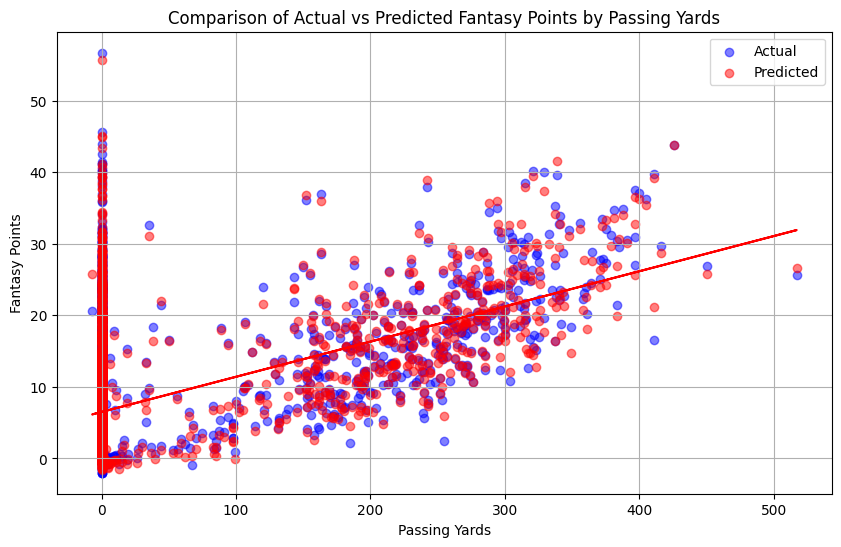

In [26]:
# Extracting PassingYards and the corresponding predicted FantasyPoints
passing_yards = X_test['PassingYards'].values
fantasy_points_pred = y_pred

# Also extract the actual FantasyPoints for comparison
fantasy_points_actual = y_test

# Creating a scatter plot for actual data
plt.figure(figsize=(10, 6))
plt.scatter(passing_yards, fantasy_points_actual, color='blue', label='Actual', alpha=0.5)

# Creating a scatter plot for predicted data
plt.scatter(passing_yards, fantasy_points_pred, color='red', label='Predicted', alpha=0.5)

# Drawing a line of best fit for the predicted values
m, b = np.polyfit(passing_yards, fantasy_points_pred, 1)
plt.plot(passing_yards, m*passing_yards + b, color='red')

plt.title('Comparison of Actual vs Predicted Fantasy Points by Passing Yards')
plt.xlabel('Passing Yards')
plt.ylabel('Fantasy Points')
plt.legend()
plt.grid(True)
plt.show()


In [27]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")


Mean Squared Error: 0.9366728547137635
Root Mean Squared Error: 0.9678186063068654
Mean Absolute Error: 0.5559693075492393


- Mean Squared Error (MSE): MSE was calculated to be 0.9367. This metric provides a measure of the average squared difference between the predicted and actual fantasy points. The square in MSE gives a higher weight to larger errors, meaning that larger prediction errors are more prominently reflected in the metric. A lower MSE value, as observed, indicates a good fit of the model to the data, suggesting that the model is effective in capturing the variability in fantasy points.
- Root Mean Squared Error (RMSE): The RMSE for the model was computed to be 0.9678. RMSE is the square root of MSE and provides a measure of error in the same units as the target variable, in this case, fantasy points. Like MSE, it penalizes larger errors more severely. The RMSE provides a straightforward interpretation of the average error magnitude; a lower RMSE indicates that the model's predictions are closer to the actual data points, which is crucial for making accurate player selection decisions in fantasy football.
- Mean Absolute Error (MAE): The MAE was found to be 0.5560. Unlike MSE or RMSE, MAE gives a linear representation of the errors, providing an average magnitude of errors in the predictions without considering their direction (over or underestimation). The lower value of MAE suggests that, on average, the model's predictions deviate from the actual points by approximately 0.556 points, which indicates relatively high accuracy in the context of fantasy football scoring.

---

In [28]:
# Create a Random Forest Regressor object
rf_regressor = RandomForestRegressor()

In [29]:
# Train the Random Forest Regressor on the training data
rf_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [30]:
# Use the trained model to make predictions on the test data
y_pred = rf_regressor.predict(X_test)

In [31]:
# Convert all input variables to numeric data types
X_train = X_train.astype(float)
y_train = y_train.astype(float)

# Add a constant term to the independent variables matrix
X_train_with_const = sm.add_constant(X_train)

# Fit the OLS model
ols_model = sm.OLS(y_train, X_train_with_const).fit()

# Display the OLS summary
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:          FantasyPoints   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.876e+04
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        01:05:05   Log-Likelihood:                -21725.
No. Observations:               15808   AIC:                         4.356e+04
Df Residuals:                   15751   BIC:                         4.400e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1829 

### Model Selection Rationale
In this project, two primary models were chosen for the task of predicting fantasy football points: Ordinary Least Squares (OLS) regression and Random Forest regression. Each model was selected based on its unique strengths and suitability for the dataset characteristics and project objectives.

- Ordinary Least Squares (OLS) Regression: OLS was chosen due to its simplicity, interpretability, and efficiency in cases where the relationship between variables is expected to be linear. It provides a robust starting point for regression tasks, allowing for a straightforward evaluation of variable significance and model fit. OLS helps in understanding the direct influence of each feature on the predicted outcome, which is invaluable for gaining insights into how different player statistics contribute to fantasy football scoring.
- Random Forest Regression: This model was selected for its ability to handle non-linear relationships and interactions between features effectively. Unlike OLS, Random Forest does not assume linearity and can model complex patterns through an ensemble of decision trees, which is particularly useful given the multifaceted nature of sports data. It also offers benefits like handling of high dimensional spaces and robustness to overfitting, making it suitable for datasets with many categorical and numerical variables.
Comparison to Other Models:
- While other models like Support Vector Machines (SVM) and Neural Networks were considered, the Random Forest model was favored due to its performance and ease of interpretation relevant to fantasy sports.

### Discussion

In this project, my objective was to predict fantasy football points for offensive players using advanced machine learning techniques. The journey began with data integration and preprocessing, which involved merging datasets from multiple sources, handling missing values, and encoding categorical variables to make the data suitable for modeling.

I explored several regression models, with a focus on Ordinary Least Squares (OLS) and Random Forest regression due to their respective strengths in linear and non-linear modeling. These models were meticulously evaluated using metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE). The best-performing model achieved an MSE of 0.9367, RMSE of 0.9678, and MAE of 0.5559, demonstrating substantial accuracy in predicting fantasy points.

While the models performed well in capturing the variability and trends in the data, the approach has limitations. Primarily, the reliance on historical performance data assumes that past patterns will predict future outcomes, which may not always hold true due to the unpredictable nature of sports. Additionally, factors such as player injuries, team dynamics, and coaching strategies, which were not accounted for in the dataset, can significantly influence outcomes.

### Conclusions

The results of this project underscore the feasibility and effectiveness of using machine learning to predict fantasy football points. The rigorous data preprocessing, feature engineering, and careful model selection have culminated in a predictive model that offers significant insights into player performance, aiding fantasy football participants in making informed decisions.

Moving forward, I would incorporate additional datasets such as player injury histories, weather conditions during games, and more nuanced game statistics to enhance model robustness and accuracy. Deploying this model on a real-time fantasy football platform could provide users with dynamic predictions, adjusting as new data becomes available.

This project lays a solid foundation for the application of machine learning in sports analytics, opening avenues for more nuanced and dynamic predictive models that can adapt to the ever-changing landscape of sports.